# Credit Card Client notebook - Part 2

In [1]:
import numpy as numpy #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
# next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
import seaborn as sns # a fancy plotting package
mpl.rcParams['figure.dpi'] = 400 #high res figure
df = pd.read_csv("C:/Users/User/Desktop/Data Science/Data_Science - Credit Card Client/Cleaned_data.csv")

In [2]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [3]:
features_response = df.columns.tolist()

In [4]:
features_response[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [5]:
features_response[-5:]

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

In [6]:
items_to_remove = ['ID','SEX','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','EDUCATION_CAT','graduate school','high school',
                   'university','none','others']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [7]:
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


<AxesSubplot:>

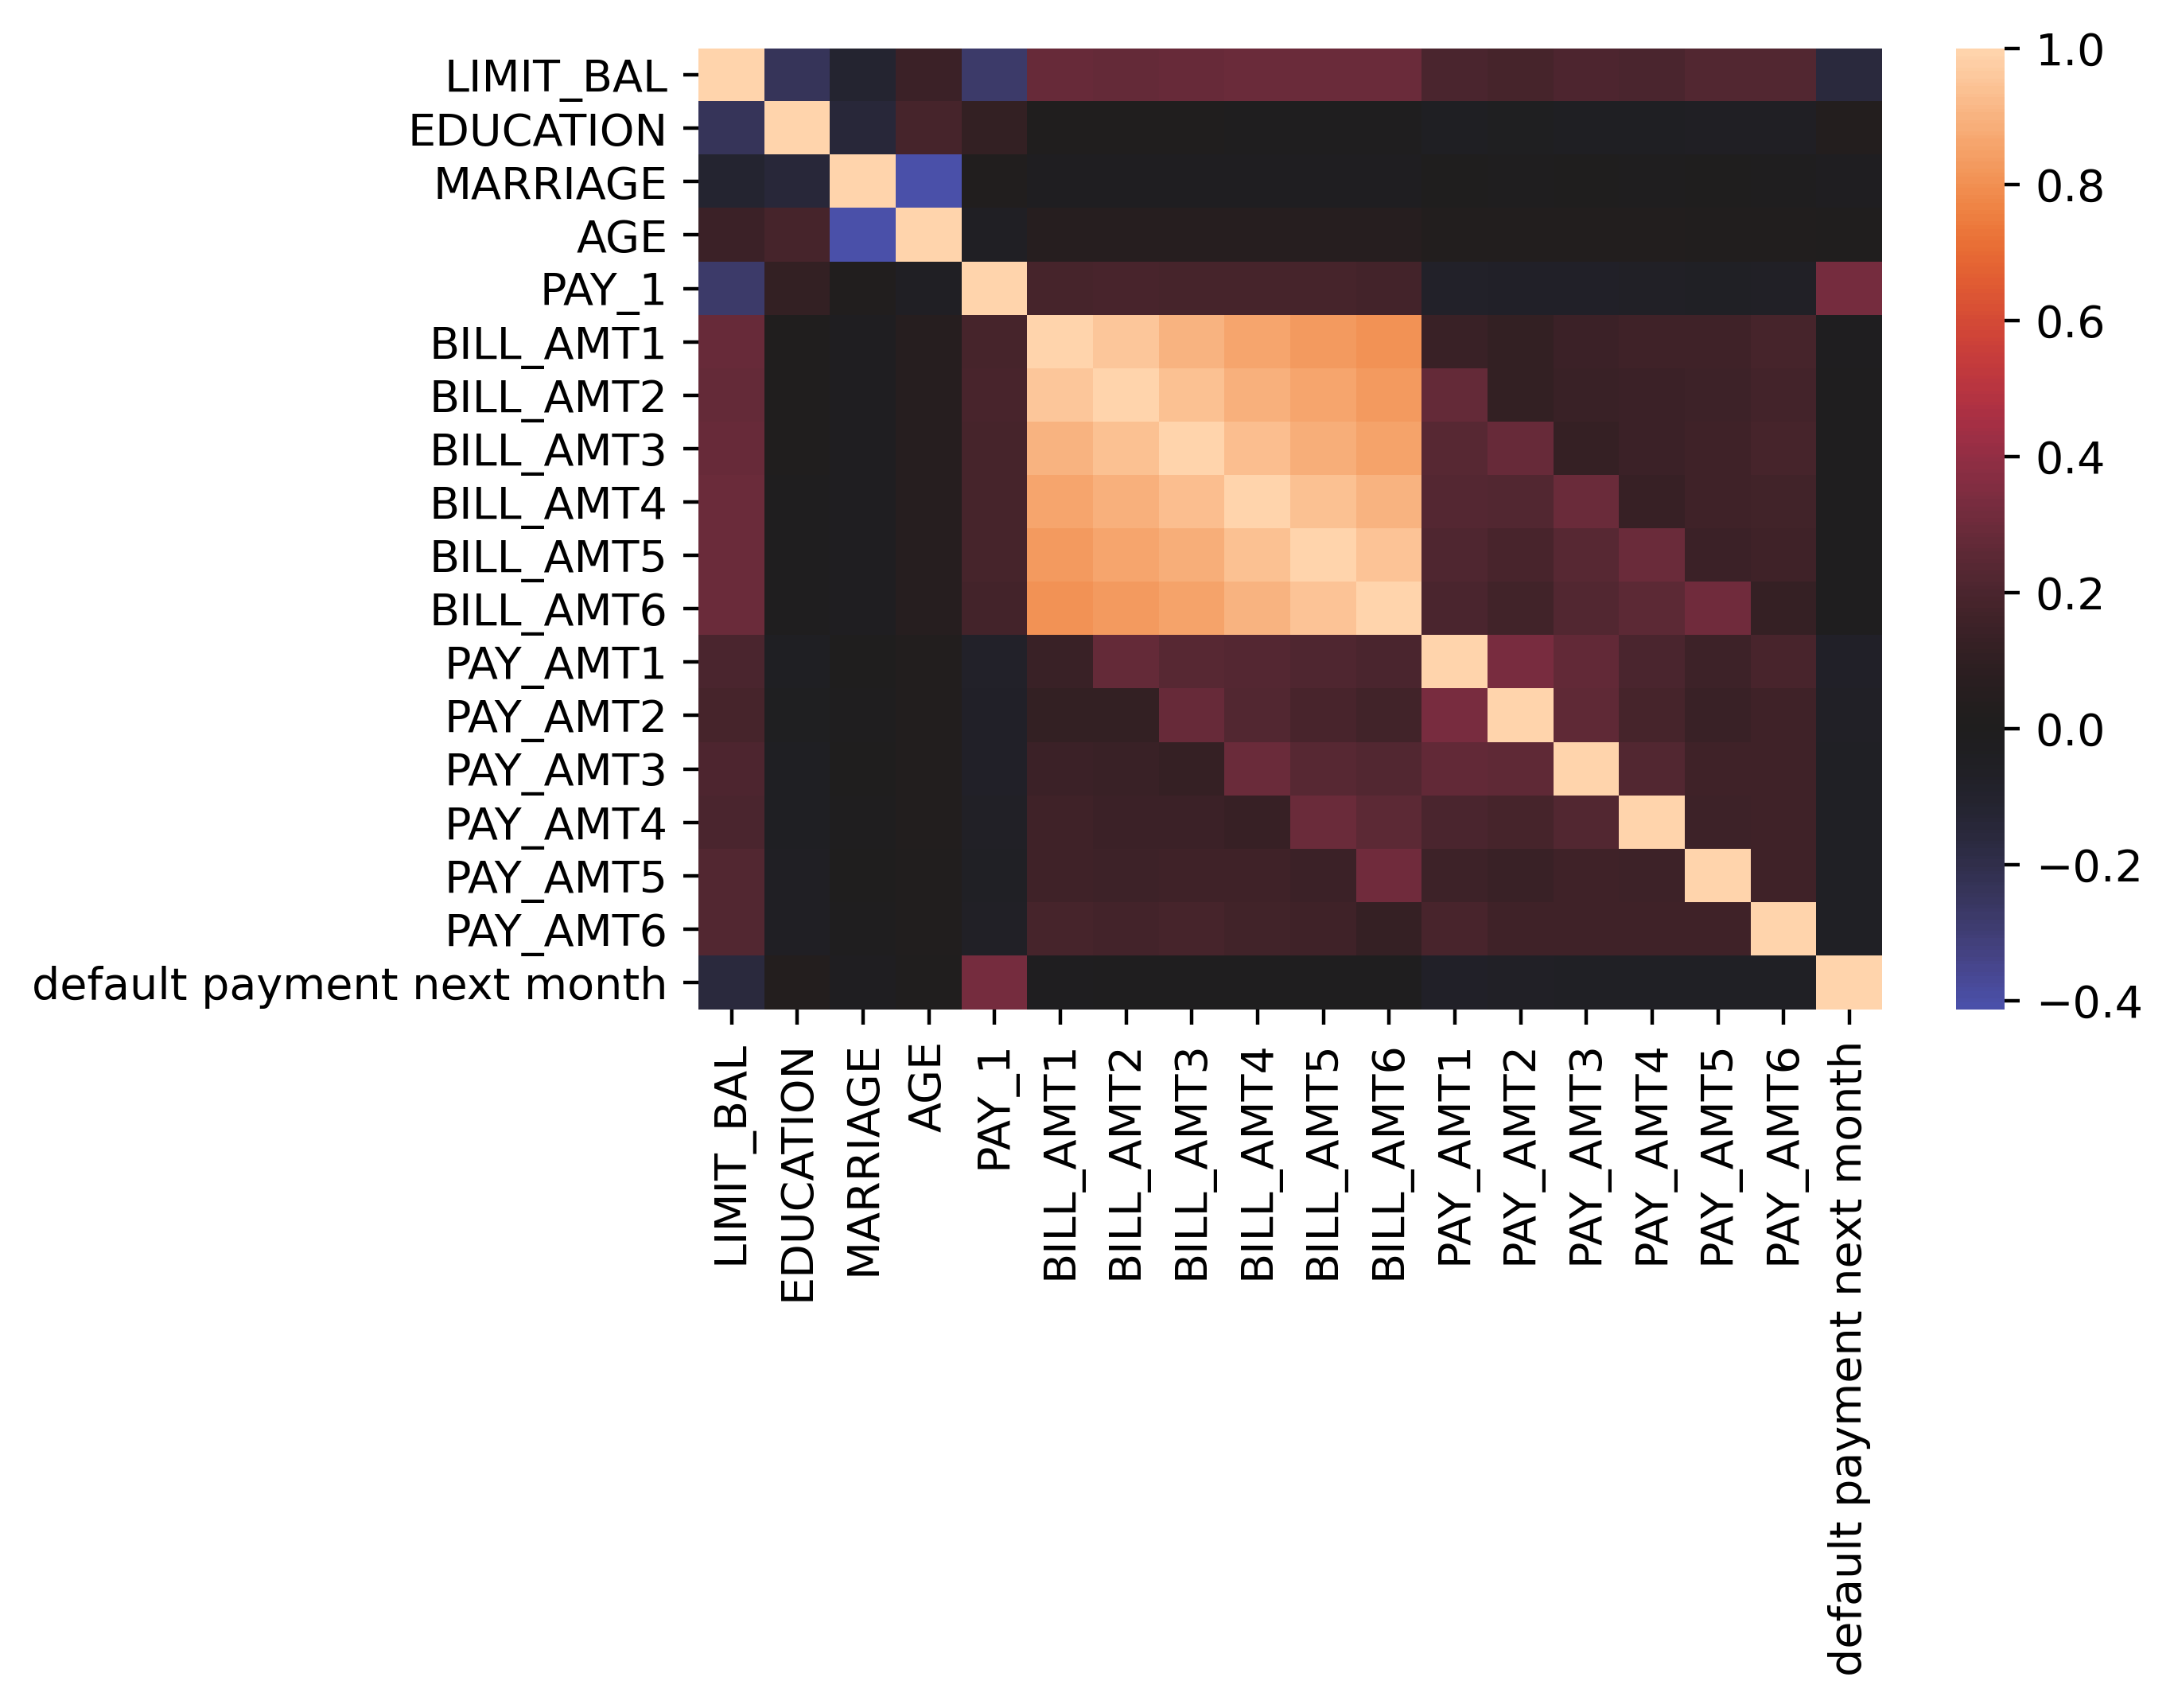

In [8]:
sns.heatmap(corr, xticklabels= corr.columns.values, yticklabels= corr.columns.values, center=0)

## ANOVA F-test

In [9]:
X = df[features_response].iloc[:,:-1].values
Y = df[features_response].iloc[:,-1].values
print(X.shape, Y.shape)

(26664, 17) (26664,)


In [10]:
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X, Y)

In [12]:
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                         'F statistic':f_stat,
                         'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [13]:
from sklearn.feature_selection import SelectPercentile
selector = SelectPercentile(f_classif, percentile=20)

In [14]:
selector.fit(X, Y)

SelectPercentile(percentile=20)

In [15]:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [17]:
features = features_response[:-1]
best_features = [features[counter] for counter in range (len(features)) if best_feature_ix[counter]]
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

## Visualizing the relationship between features and response

In [18]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [21]:
import numpy as np
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


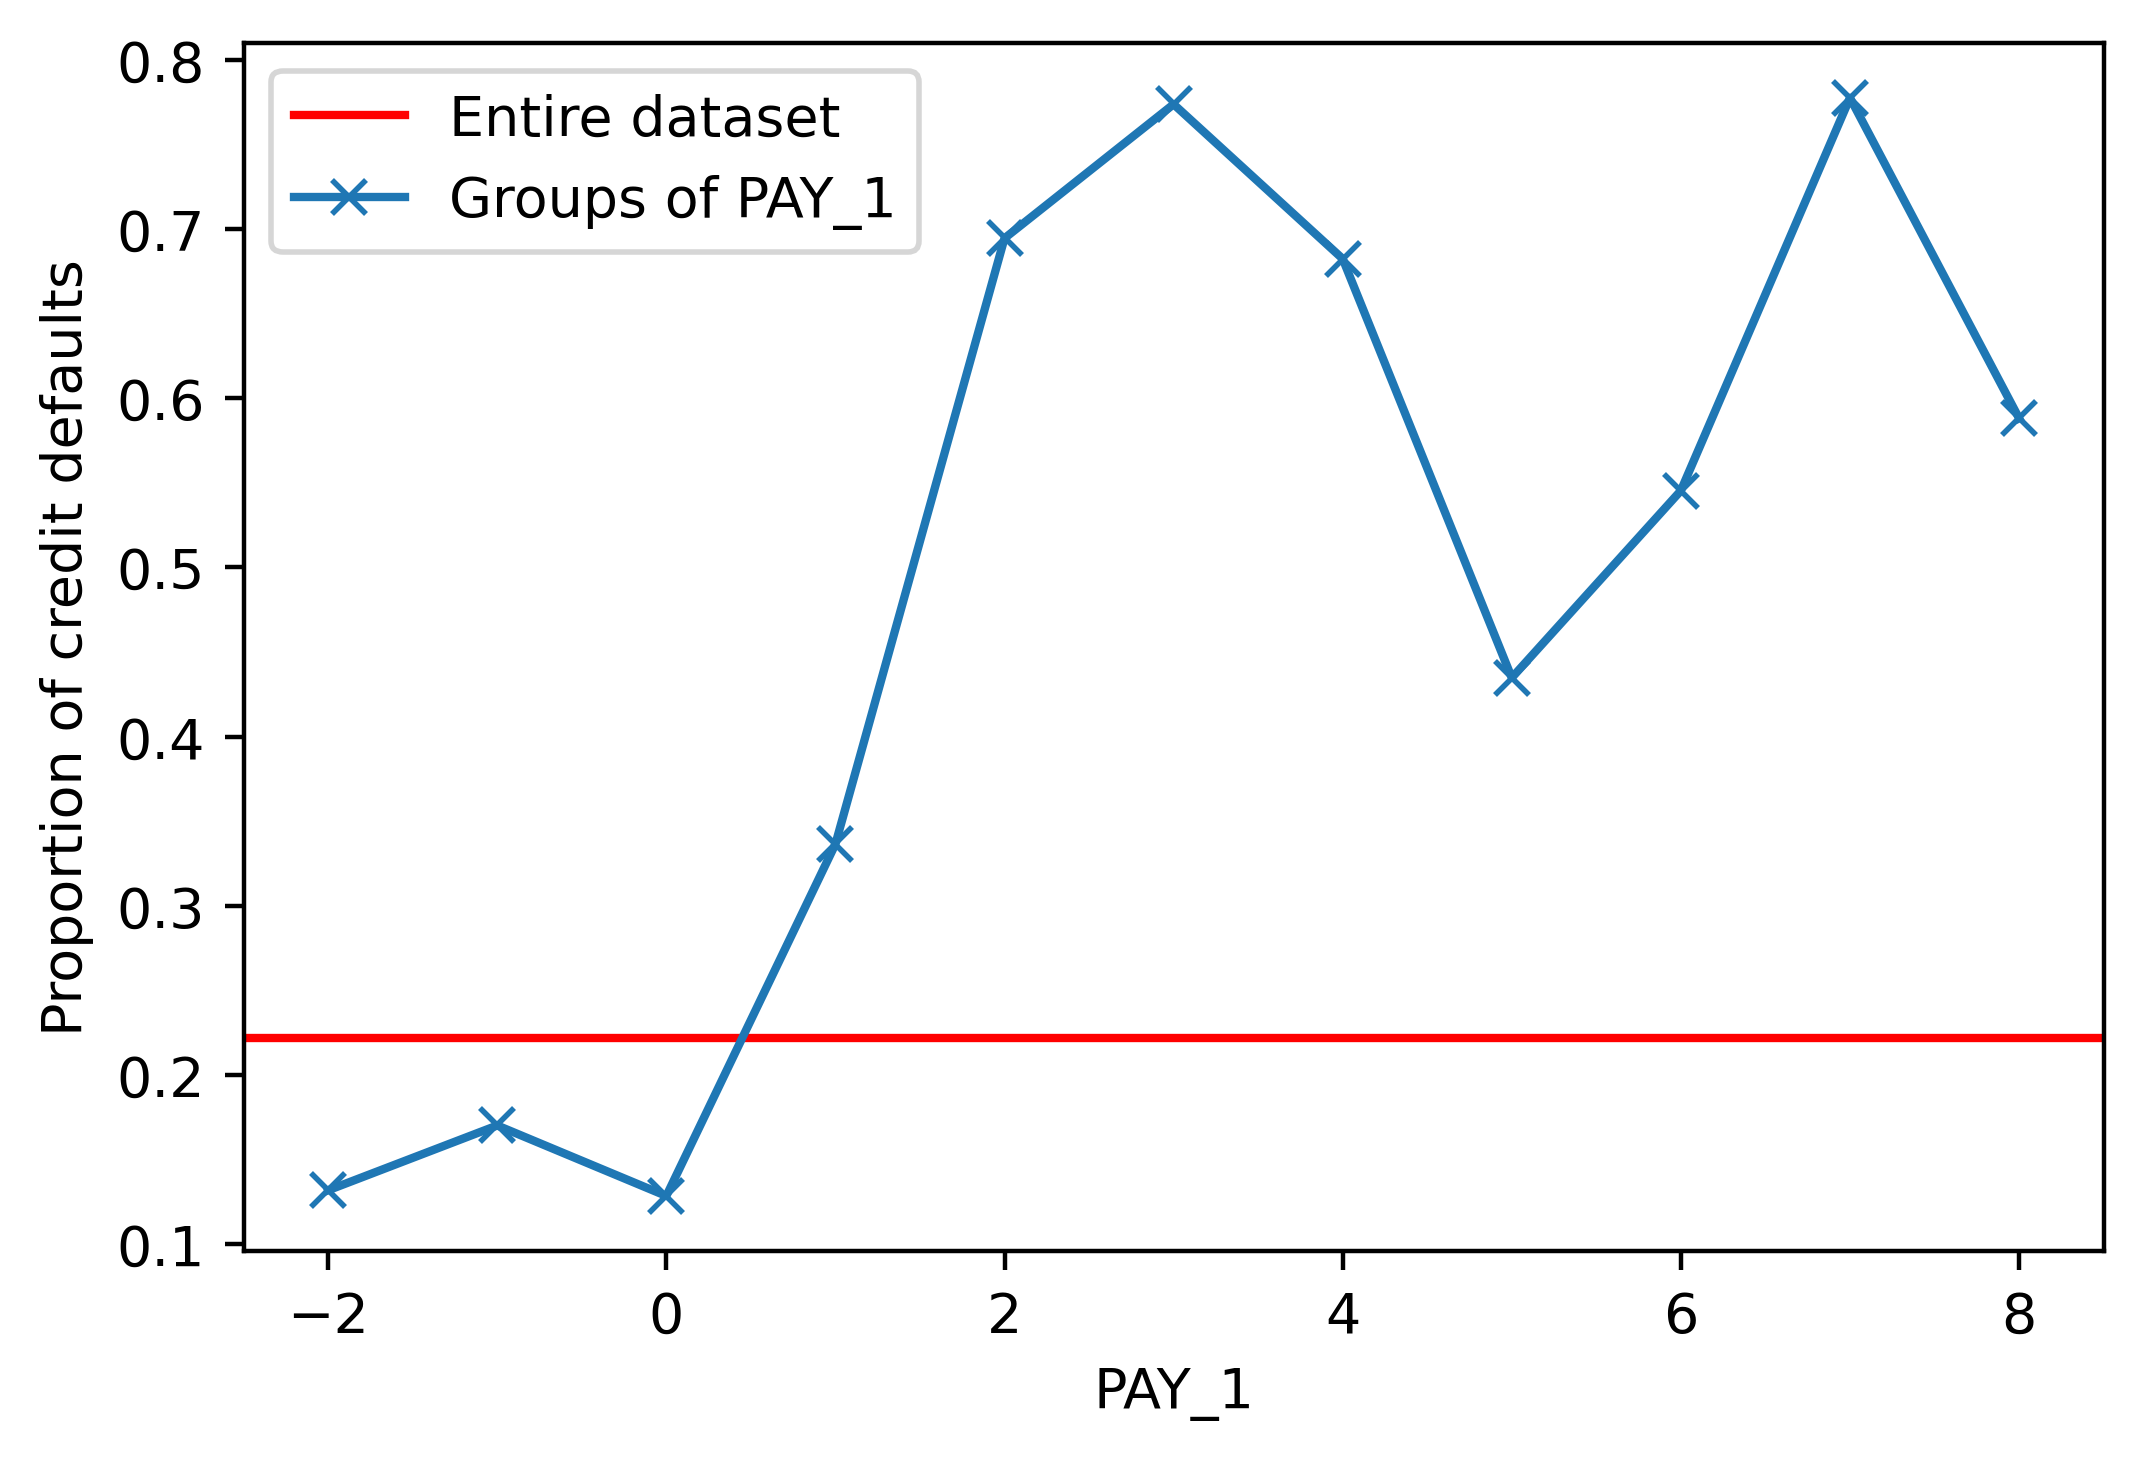

In [25]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax= axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset','Groups of PAY_1'])